# Testing the got3.embedding.legal_bert.pipe() Integration

This notebook demonstrates the integrated Legal-BERT pipeline functionality.

In [4]:
# Use a pipeline as a high-level helper
from transformers import pipeline

pipe = pipeline("fill-mask", model="nlpaueb/legal-bert-base-uncased")
pipe("Establishing a system for the identification and registration of [MASK] animals and regarding the labelling of beef and beef products .")

Device set to use mps:0


[{'score': 0.6682686805725098,
  'token': 2505,
  'token_str': 'live',
  'sequence': 'establishing a system for the identification and registration of live animals and regarding the labelling of beef and beef products.'},
 {'score': 0.1664615422487259,
  'token': 3208,
  'token_str': 'beef',
  'sequence': 'establishing a system for the identification and registration of beef animals and regarding the labelling of beef and beef products.'},
 {'score': 0.03158675879240036,
  'token': 2703,
  'token_str': 'farm',
  'sequence': 'establishing a system for the identification and registration of farm animals and regarding the labelling of beef and beef products.'},
 {'score': 0.021766601130366325,
  'token': 4629,
  'token_str': 'pet',
  'sequence': 'establishing a system for the identification and registration of pet animals and regarding the labelling of beef and beef products.'},
 {'score': 0.013928220607340336,
  'token': 5745,
  'token_str': 'dairy',
  'sequence': 'establishing a system 

## Okay so got3 should incorporate the pipeline!

- take arguments as masked token for `[MASK]` and return the top k predictions with scores


In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [6]:
def pipe_statement(statement,token_mask='[MASK]', top_k=5):
    if token_mask not in statement:
        raise ValueError(f"The token_mask '{token_mask}' is not in the statement.")

    # Replace the token_mask with the token_masking
    masked_statement = statement.replace(token_mask, token_mask)



    # Use the pipeline to get predictions
    results = pipe(masked_statement, top_k=top_k)
    
    return results


In [7]:
statement = "Establishing a system for the identification and registration of [MASK] animals and regarding the labelling of beef and beef products."
token_mask="[MASK]"
masked_token="bovine"

pipe = pipeline("fill-mask", 
                model="nlpaueb/legal-bert-base-uncased")

pipe(statement)


Device set to use mps:0


[{'score': 0.6682686805725098,
  'token': 2505,
  'token_str': 'live',
  'sequence': 'establishing a system for the identification and registration of live animals and regarding the labelling of beef and beef products.'},
 {'score': 0.1664615422487259,
  'token': 3208,
  'token_str': 'beef',
  'sequence': 'establishing a system for the identification and registration of beef animals and regarding the labelling of beef and beef products.'},
 {'score': 0.03158675879240036,
  'token': 2703,
  'token_str': 'farm',
  'sequence': 'establishing a system for the identification and registration of farm animals and regarding the labelling of beef and beef products.'},
 {'score': 0.021766601130366325,
  'token': 4629,
  'token_str': 'pet',
  'sequence': 'establishing a system for the identification and registration of pet animals and regarding the labelling of beef and beef products.'},
 {'score': 0.013928220607340336,
  'token': 5745,
  'token_str': 'dairy',
  'sequence': 'establishing a system 

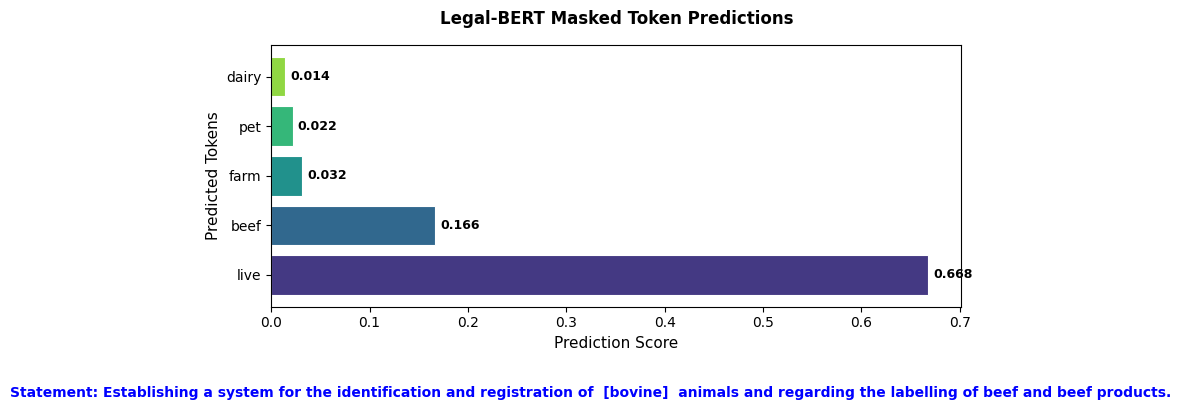

Top predictions for masked token (highest to lowest):
1. 'live' - Score: 0.6683
2. 'beef' - Score: 0.1665
3. 'farm' - Score: 0.0316
4. 'pet' - Score: 0.0218
5. 'dairy' - Score: 0.0139


In [8]:
# Set modern style
#plt.style.use('seaborn-v0_8')
sns.set_palette("viridis")
sns.color_palette("coolwarm", as_cmap=True)

# Get predictions for the statement
results = pipe_statement(statement, token_mask="[MASK]", top_k=5)

# Extract token strings and scores, sort by score descending
tokens = [result['token_str'] for result in results]
scores = [result['score'] for result in results]

# Create DataFrame and sort by score descending
df = pd.DataFrame({'token': tokens, 'score': scores})
df = df.sort_values('score', ascending=False)

# Create a horizontal bar plot
plt.figure(figsize=(8, 4))
bars = plt.barh(df['token'], df['score'], color=sns.color_palette("viridis", len(df)), 
                edgecolor='white', linewidth=0.8)

plt.xlabel('Prediction Score', fontsize=11)
plt.ylabel('Predicted Tokens', fontsize=11)
plt.title('Legal-BERT Masked Token Predictions', fontsize=12, fontweight='bold', pad=15)
# subtitle with masked statement
plt.suptitle(f"Statement: {statement.replace(token_mask, ' [{}] '.format(masked_token))}", 
                            fontsize=10,
                            fontweight='bold',
                            y=-0.05,
                            color='blue')

# Add score labels on the bars
for i, (token, score) in enumerate(zip(df['token'], df['score'])):
    plt.text(score + 0.005, i, f'{score:.3f}', va='center', fontsize=9, fontweight='bold')

plt.tight_layout()
plt.show()

# Also print the results in a nice format
print("Top predictions for masked token (highest to lowest):")
for i, (_, row) in enumerate(df.iterrows(), 1):
    print(f"{i}. '{row['token']}' - Score: {row['score']:.4f}")

## Demonstrated in the got3 module

- this shows a workflow for including a demonstrative notebook for a model embedding with a clear usecase for the got3 module development. 
- Below demonstrates the masking and visualization functionality. future version should explore a json output (i.e. if json is true, ignore visualization and return json serialized value (i.e. the default output of the pipe))

In [20]:
### Trying it on got3
import getout_of_text_3 as got3

got3.__version__

'0.2.3'

Top predictions for masked token (highest to lowest):
1. 'live' - Score: 0.6683
2. 'beef' - Score: 0.1665
3. 'farm' - Score: 0.0316
4. 'pet' - Score: 0.0218
5. 'dairy' - Score: 0.0139
6. 'certain' - Score: 0.0121
7. 'bovi' - Score: 0.0083
8. 'slaughter' - Score: 0.0067


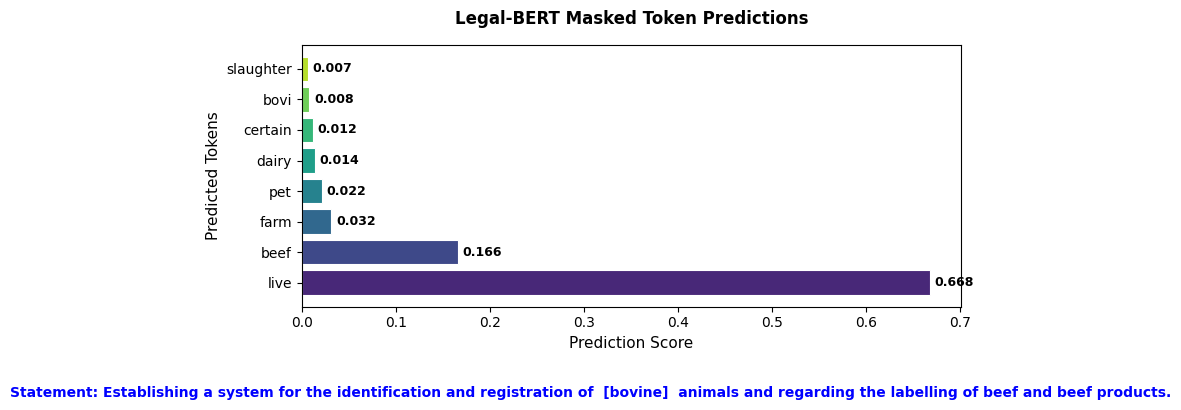

In [11]:
# Use the pipe function (recommended approach)
results = got3.embedding.legal_bert.pipe(statement, 
                                         masked_token='bovine', 
                                         token_mask='[MASK]',
                                         top_k=8, 
                                         visualize=True)


In [1]:
### Just JSON output
results = got3.embedding.legal_bert.pipe(statement, 
                                         masked_token='bovine', 
                                         token_mask='[MASK]',
                                         top_k=3, 
                                         visualize=False,
                                         json_output=True)

results

NameError: name 'got3' is not defined

Top predictions for masked token (highest to lowest):
1. 'live' - Score: 0.6683
2. 'beef' - Score: 0.1665
3. 'farm' - Score: 0.0316
4. 'pet' - Score: 0.0218
5. 'dairy' - Score: 0.0139


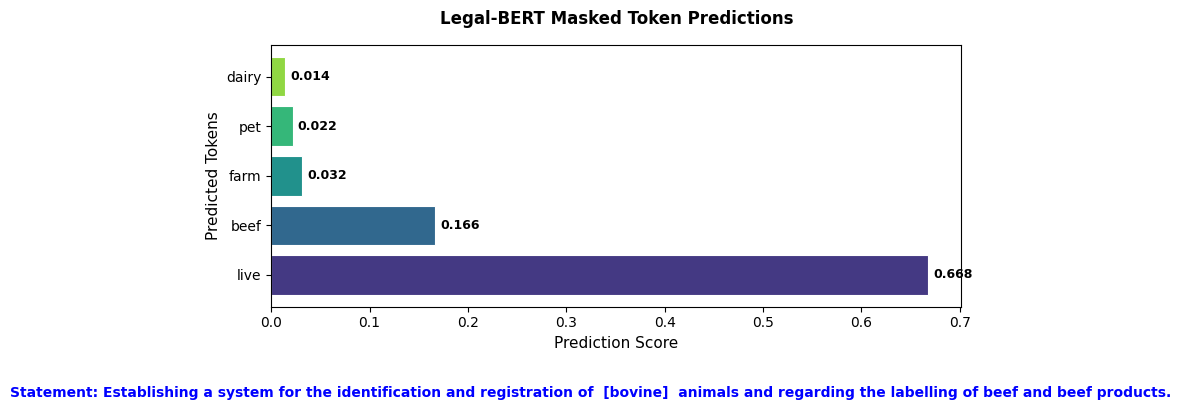

In [10]:
import getout_of_text_3 as got3

statement = "Establishing a system for the identification and registration of [MASK] animals and regarding the labelling of beef and beef products."
masked_token="bovine"
token_mask="[MASK]"

results = got3.embedding.legal_bert.pipe(statement=statement, # the input text with a [MASK] token
                                         masked_token=masked_token, # any token
                                         token_mask=token_mask, # Default to [MASK]
                                         top_k=5,  # Set number of top predictions to return
                                         visualize=True, # Set to True to display barchart visualization
                                         json_output=False, # Set to True for JSON output
                                         model_name="nlpaueb/legal-bert-base-uncased") # use small for similar results and lesser footprint

Top predictions for masked token (highest to lowest):
1. 'all' - Score: 0.0788
2. 'live' - Score: 0.0692
3. 'certain' - Score: 0.0680
4. 'the' - Score: 0.0652
5. 'farm' - Score: 0.0530


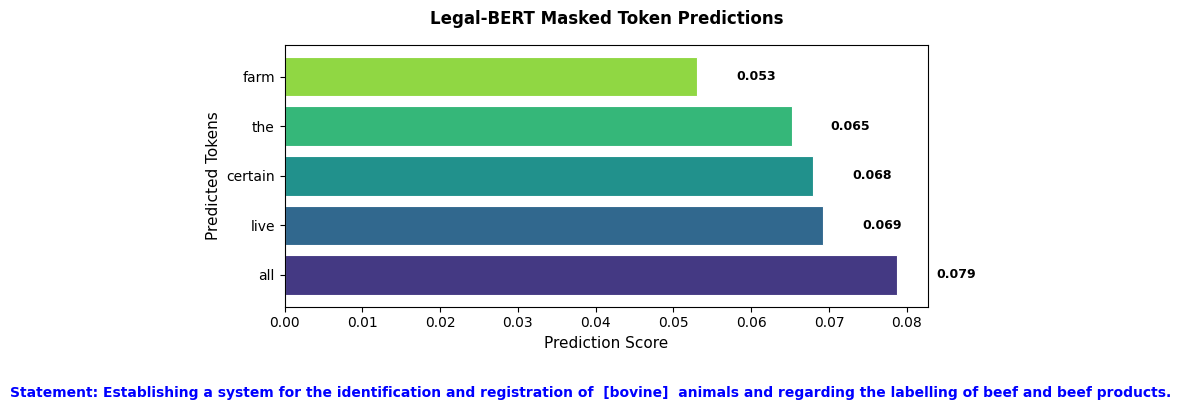

In [6]:
## Smal model

import getout_of_text_3 as got3

statement = "Establishing a system for the identification and registration of [MASK] animals and regarding the labelling of beef and beef products."
masked_token="bovine"
token_mask="[MASK]"

results = got3.embedding.legal_bert.pipe(statement=statement, # the input text with a [MASK] token
                                         masked_token=masked_token, # any token
                                         token_mask=token_mask, # Default to [MASK]
                                         top_k=5,  # Set number of top predictions to return
                                         visualize=True, # Set to True to display barchart visualization
                                         json_output=False, # Set to True for JSON output
                                         model_name="nlpaueb/legal-bert-small-uncased")

_________________

### Example again with Vehicles & Segways

Top predictions for masked token (highest to lowest):
1. 'motor' - Score: 0.9345
2. 'commercial' - Score: 0.0147
3. 'private' - Score: 0.0082
4. 'such' - Score: 0.0053
5. 'police' - Score: 0.0047


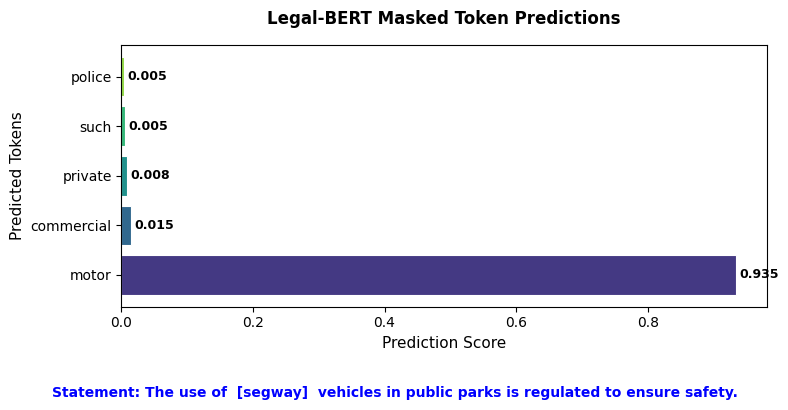

In [26]:
## Smal model

import getout_of_text_3 as got3

statement = "The use of [MASK] vehicles in public parks is regulated to ensure safety."
masked_token="segway"
token_mask="[MASK]"

results = got3.embedding.legal_bert.pipe(statement=statement, # the input text with a [MASK] token
                                         masked_token=masked_token, # any token
                                         token_mask=token_mask, # Default to [MASK]
                                         top_k=5,  # Set number of top predictions to return
                                         visualize=True, # Set to True to display barchart visualization
                                         json_output=False, # Set to True for JSON output
                                         model_name="nlpaueb/legal-bert-base-uncased")